In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
from datetime import datetime

In [2]:
df1= pd.read_csv('../input/tabular-playground-series-mar-2022/train.csv')
df2= pd.read_csv('../input/tabular-playground-series-mar-2022/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-mar-2022/sample_submission.csv')

<AxesSubplot:>

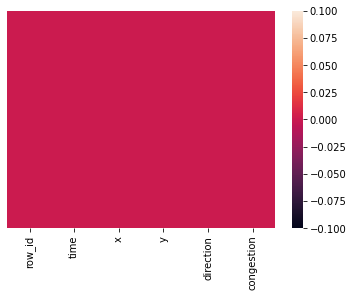

In [3]:
sns.heatmap(df1.isnull(), yticklabels=False )

<AxesSubplot:>

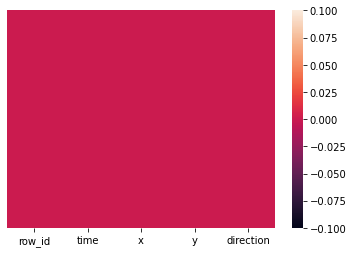

In [4]:
sns.heatmap(df2.isnull(), yticklabels=False )

In [5]:
#from above data we can see no null values

In [6]:
df1.duplicated().sum(), df2.duplicated().sum()

(0, 0)

In [7]:
#from above details we can see min and max year are the same, so we not to take year in data

In [8]:
df1['Date'] = pd.to_datetime(df1['time']).dt.date
df1['Time']=pd.to_datetime(df1['time']).dt.time
df1.drop(['time'],axis=1, inplace=True)

In [9]:
df1['day']=pd.to_datetime(df1['Date']).dt.day
df1['month']=pd.to_datetime(df1['Date']).dt.month
df1['year']=pd.to_datetime(df1['Date']).dt.year
df1['Time'] = pd.to_datetime(df1['Time'].astype(str))
df1['hour']=pd.to_datetime(df1['Time']).dt.hour
df1['minute']=pd.to_datetime(df1['Time']).dt.minute
df1.drop(['Date','Time'],axis=1,inplace=True)

In [10]:
df2['Date'] = pd.to_datetime(df2['time']).dt.date
df2['Time']=pd.to_datetime(df2['time']).dt.time
df2.drop(['time'],axis=1, inplace=True)
df2['day']=pd.to_datetime(df2['Date']).dt.day
df2['month']=pd.to_datetime(df2['Date']).dt.month
df2['year']=pd.to_datetime(df2['Date']).dt.year

In [11]:
df2['Time'] = pd.to_datetime(df2['Time'].astype(str))
df2['hour']=pd.to_datetime(df2['Time']).dt.hour
df2['minute']=pd.to_datetime(df2['Time']).dt.minute
df2.drop(['Date','Time'],axis=1,inplace=True)

In [12]:
##For direction
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1['direction'])
df1['direction'] = le.transform(df1['direction'])

In [13]:
le.fit(df2['direction'])
df2['direction'] = le.transform(df2['direction'])

In [14]:
X=df1.drop(['row_id','congestion'],axis=1)
y=df1['congestion']

In [15]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred=model.predict(X_test).astype(int)
y_pred_train=model.predict(X_train).astype(int)

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
mae_test=mean_absolute_error(y_test, y_pred)
mae_train=mean_absolute_error(y_train, y_pred_train)

In [20]:
mae_test

13.570569131870679

In [21]:
mae_train

13.564461513605213

In [22]:
df3=df2.drop(['row_id'],axis=1)

In [23]:
ypred3=model.predict(df3).astype(int)

In [24]:
df=pd.DataFrame(ypred3,columns=['congestion'])

In [25]:
sample_submission['congestion']=df['congestion']
sample_submission.head()

,row_id,congestion
0,848835,50
1,848836,49
2,848837,49
3,848838,48
4,848839,48


In [26]:
sample_submission.to_csv('./submission.csv',index=False)